## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [1]:
# Reservado para a importação de bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

In [2]:
# 1. Abra a base de dados em questão
df = pd.read_csv('dataset/covtype.csv', sep = ',')

In [3]:
# 2. Elimine todas as colunas relativas aos atributos categóricos
df_attributes = df.drop(['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'], axis = 1).dropna()

In [4]:
# 3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
y = df_attributes['Cover_Type']
X = df_attributes.drop('Cover_Type', axis = 1)

In [5]:
# 4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
# 5. Efetue o escalonamento dos atributos
X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_std = (X_test - np.mean(X_train)) / np.std(X_train)

In [7]:
# 5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios
layer = 1
neuron = 10
final_layer = [neuron] * layer

# 5.1 Utilize a função de ativação ReLU
activation = 'relu'

# 5.2 Utilize o solver Adam
solver = 'adam'

# 5.3 Imprima o passo a passo do treinamento
print_training = True

# 5.4 Utilize o número máximo de épocas igual a 300
max_times = 300

training = MLPClassifier(hidden_layer_sizes = final_layer, activation = activation, solver = solver, random_state = 1, max_iter = max_times, verbose = print_training).fit(X_train_std, y_train) 

Iteration 1, loss = 0.92765055
Iteration 2, loss = 0.70758994
Iteration 3, loss = 0.68892026
Iteration 4, loss = 0.68026363
Iteration 5, loss = 0.67402233
Iteration 6, loss = 0.66988300
Iteration 7, loss = 0.66756255
Iteration 8, loss = 0.66609690
Iteration 9, loss = 0.66474706
Iteration 10, loss = 0.66373022
Iteration 11, loss = 0.66286903
Iteration 12, loss = 0.66209574
Iteration 13, loss = 0.66131509
Iteration 14, loss = 0.66061059
Iteration 15, loss = 0.65990320
Iteration 16, loss = 0.65932351
Iteration 17, loss = 0.65874958
Iteration 18, loss = 0.65828770
Iteration 19, loss = 0.65769894
Iteration 20, loss = 0.65740434
Iteration 21, loss = 0.65713214
Iteration 22, loss = 0.65685121
Iteration 23, loss = 0.65663717
Iteration 24, loss = 0.65646028
Iteration 25, loss = 0.65630332
Iteration 26, loss = 0.65606577
Iteration 27, loss = 0.65591696
Iteration 28, loss = 0.65583588
Iteration 29, loss = 0.65565407
Iteration 30, loss = 0.65552339
Iteration 31, loss = 0.65548655
Iteration 32, los

In [8]:
# 6. Com o modelo em questão, após o treinamento, apresente:
predictions = training.predict(X_test_std)
confusion_matrix = pd.crosstab(y_test, predictions)

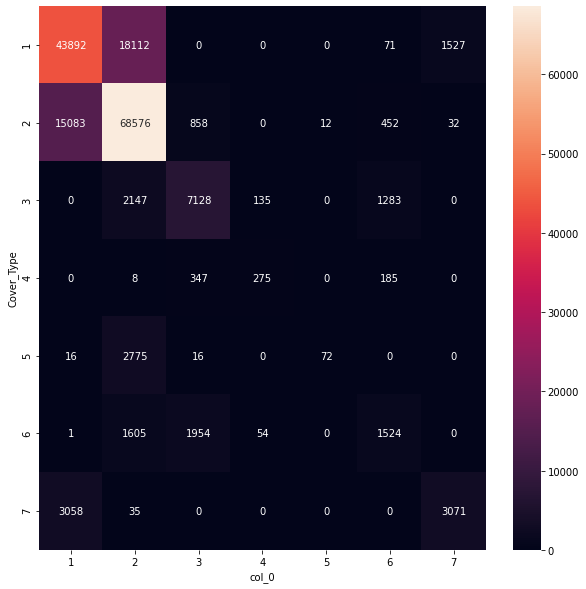

Acurácia:  0.7144873324765926
F-Score:  0.5066929180914783
Precisão:  0.6687439080862309
Revocação:  0.47437463067444696


In [9]:
# 6.1 Matriz de confusão para o conjunto de teste
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(confusion_matrix, annot = True, ax = ax, fmt = 'd')
plt.show()

# 6.2 Acurácia
print('Acurácia: ', accuracy_score(y_test,predictions))

# 6.3 F-Score
print('F-Score: ', f1_score(y_test,predictions, average = 'macro'))

# 6.4 Precisão
print('Precisão: ', precision_score(y_test,predictions, average = 'macro'))

# 6.5 Revocação
print('Revocação: ', recall_score(y_test,predictions, average = 'macro'))

In [21]:
# 7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino
accuracy = []
fscore = []

# 7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout
def training():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
    X_test_std = (X_test - np.mean(X_train)) / np.std(X_train)
    training = MLPClassifier(hidden_layer_sizes = final_layer, activation = activation, solver = solver, random_state = 1, max_iter = max_times, verbose = print_training).fit(X_train_std, y_train)
    predictions = training.predict(X_test_std)
    
    accuracy.append(accuracy_score(y_test,predictions))
    fscore.append(f1_score(y_test,predictions, average = 'macro'))

# 7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes
print_training = False
for i in range(100):
    training()

In [25]:
print('Acurácia: média =', np.mean(accuracy), 'e desvio padrão =', np.std(accuracy))
print('F-Score: média =', np.mean(fscore), 'e desvio padrão =', np.std(fscore))

Acurácia: média = 0.7163863135671011 e desvio padrão = 0.0001950615017440871
F-Score: média = 0.5188056559817629 e desvio padrão = 0.00048484995994596547


In [35]:
# 8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD
solver = 'sgd'
accuracy = []
fscore = []

for i in range(2):
    training()

In [37]:
# 8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino
print('Acurácia: média =', np.mean(accuracy), 'e desvio padrão =', np.std(accuracy))
print('F-Score: média =', np.mean(fscore), 'e desvio padrão =', np.std(fscore))

Acurácia: média = 0.6955233385349734 e desvio padrão = 0.0005651046447585628
F-Score: média = 0.4272705926371475 e desvio padrão = 0.0031232546979116094


**9.** Sim, houve diferença entre eles. Quanto ao tempo de execução, o otimizador Adam teve um melhor resultado, porém o SGD demonstrou um melhor resultado.

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [34]:
# 1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
architectures = [[1, 10, 'relu', 'sgd', 100], 
                [2, 10, 'relu', 'adam', 150],
                [1, 20, 'relu', 'adam', 200],
                [1, 20, 'tanh', 'adam', 100],
                [2, 10, 'tanh', 'sgd', 200],
                [1, 10, 'tanh', 'sgd', 150],
                [2, 20, 'logistic', 'adam', 100],
                [1, 20, 'logistic', 'sgd', 150],
                [2, 10, 'identity', 'adam', 100],
                [2, 20, 'identity', 'sgd', 150]]

arch_accuracy = []
arch_fscore = []

# Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
for i in architectures:
    layer = i[0]
    neuron = i[1]
    final_layer = [neuron] * layer
    activation = i[2]
    solver = i[3]
    max_times = i[4]
    accuracy = []
    fscore = []
    
    for i in range(2):
        training()
        
        arch_accuracy.append(accuracy)
        arch_fscore.append(fscore)

In [ ]:
# Como resultado da avaliação, apresente:
# 3.1 Top-3 melhores redes no tocante à F-Score e Acurácia
print(arch_accuracy.sort_values, ascending=False)
print(arch_fscore.sort_values, ascending=False)

# 3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_h$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?